In [1]:
# Load Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


#Set Working Directory
os.chdir(r"/Users/glinn/Documents/CSCI5622-machine-learning/project/csci5622project")

In [2]:
def TurnDfXIntoArray(df):
    df=df.drop(columns=["Unnamed: 0"])
    array = np.array(df)
    return array
def TurnDfYIntoVector(df):
    array = np.array(df,dtype=int)
    return array
def OneHotEncodeCategory(df,CategoryHeader):
    df = pd.get_dummies(df,columns = CategoryHeader)
    array = TurnDfXIntoArray(df)
    return array
def ScoreModels(Model,X_test,Y_test):
    yhat = Model.predict(X_test)
    yhat = np.array(yhat)
    accuracy = accuracy_score(Y_test,yhat)
    return accuracy,yhat

Import the test data

In [3]:
#Test Data:

#Base
X_test_Base_df = pd.read_csv(r"data/preprocess-base-x-test.csv")
Y_test_Base_df = pd.read_csv(r"data/preprocess-base-y-test.csv")
X_test_Base = OneHotEncodeCategory(X_test_Base_df,["main_category","category"])
Y_test_Base = TurnDfYIntoVector(Y_test_Base_df)
#Doc2Vec
X_test_Doc2Vec_df = pd.read_csv(r"data/preprocess-doc2vec-x-test.csv")
Y_test_Doc2Vec_df = pd.read_csv(r"data/preprocess-doc2vec-y-test.csv")
X_test_Doc2Vec = OneHotEncodeCategory(X_test_Doc2Vec_df,["main_category","category"])
Y_test_Doc2Vec = TurnDfYIntoVector(Y_test_Doc2Vec_df)
#Basic Name
X_test_BasicName_df = pd.read_csv(r"data/preprocess-basic_name-x-test-correct.csv")
X_test_BasicName_df = X_test_BasicName_df.drop(columns=["Unnamed: 0.1"])
Y_test_BasicName_df = pd.read_csv(r"data/preprocess-basic_name-y-test-correct.csv")
X_test_BasicName= OneHotEncodeCategory(X_test_BasicName_df,["main_category","category"])
Y_test_BasicName = TurnDfYIntoVector(Y_test_BasicName_df)

Import the optimal model coefficients 

In [4]:
#Base
Coef_Base = pd.read_csv(r"Figures/LogReg/BaseDataset/CoefficientsBothOneHot",header=None)
Coef_Base = np.array(Coef_Base)
#Doc2Vec
Coef_Doc2Vec = pd.read_csv(r"Figures/LogReg/Doc2VecDataSet/CoefficientsBothOneHot",header=None)
Coef_Doc2Vec = np.array(Coef_Doc2Vec)
#Basic Name
Coef_BasicName = pd.read_csv(r"Figures/LogReg/BasicNamesDataSet/CoefficientsBothOneHot",header=None)
Coef_BasicName = np.array(Coef_BasicName)

Build the Optimal Models

In [5]:
Clases = np.array([0,1])
#Base
LogReg_Base = LogisticRegression(penalty='l1',n_jobs=-1,max_iter=200)
LogReg_Base.classes_= Clases
LogReg_Base.coef_ = Coef_Base[0,1:].reshape(1,len(Coef_Base[0,1:]))
LogReg_Base.intercept_ = Coef_Base[0,0]
#Doc2Vec
LogReg_Doc2Vec = LogisticRegression(penalty='l1',n_jobs=-1,max_iter=200)
LogReg_Doc2Vec.classes_= Clases
LogReg_Doc2Vec.coef_ = Coef_Doc2Vec[0,1:].reshape(1,len(Coef_Doc2Vec[0,1:]))
LogReg_Doc2Vec.intercept_ = Coef_Doc2Vec[0,0]
#Basic Name
LogReg_BasicName = LogisticRegression(penalty='l1',n_jobs=-1,max_iter=200)
LogReg_BasicName.classes_= Clases
LogReg_BasicName.coef_ = Coef_BasicName[0,1:].reshape(1,len(Coef_BasicName[0,1:]))
LogReg_BasicName.intercept_ = Coef_BasicName[0,0]

Score all of the models

In [6]:
#Base
Accuracy_Base,yhat_Base = ScoreModels(LogReg_Base,X_test_Base,Y_test_Base)
#Doc2Vec
Accuracy_Doc2Vec,yhat_Doc2Vec = ScoreModels(LogReg_Doc2Vec,X_test_Doc2Vec,Y_test_Doc2Vec)
#BasicName
Accuracy_BasicName,yhat_BasicName = ScoreModels(LogReg_BasicName,X_test_BasicName,Y_test_BasicName)

0.666546683464315 0.6667866498690184 0.662907192992981


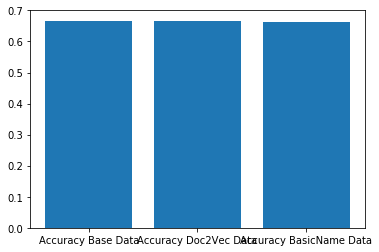

In [7]:
plt.bar(["Accuracy Base Data","Accuracy Doc2Vec Data","Accuracy BasicName Data"],[Accuracy_Base,Accuracy_Doc2Vec,Accuracy_BasicName])
print(Accuracy_Base,Accuracy_Doc2Vec,Accuracy_BasicName)

In [8]:
pickle.dump(yhat_Base, open(r"Figures/LogReg/BaseDataset/yhat_TEST_Base.pickle","wb"))
#yhat_Base_test = pickle.load(open(r"Figures/LogReg/BaseDataset/yhat_TEST_Base.pickle","rb"))
pickle.dump(yhat_Doc2Vec, open(r"Figures/LogReg/Doc2VecDataSet/yhat_TEST_Doc2Vec.pickle","wb"))
pickle.dump(yhat_BasicName, open(r"Figures/LogReg/BasicNamesDataSet/yhat_TEST_BasicName.pickle","wb"))